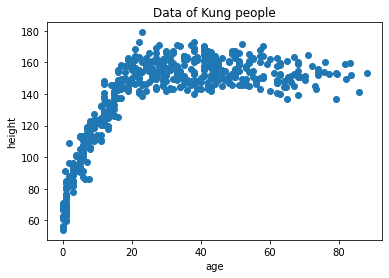

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bd9a5bbb7cb420216b370a680f3f14a3 NOW.


             alpha         beta        sigma         lp__
count  4000.000000  4000.000000  4000.000000  4000.000000
mean     -1.081940     1.861288    49.934475 -3391.811035
std       0.821081     1.673624     0.088179   939.994317
min      -1.798875    -0.572258    49.162858 -4943.561103
25%      -1.650014     0.659799    49.911506 -3824.331001
50%      -1.459106     1.823052    49.971450 -3054.080510
75%      -0.820132     3.444021    49.990986 -2629.655396
max       0.353426     3.678503    49.999993 -2616.499009


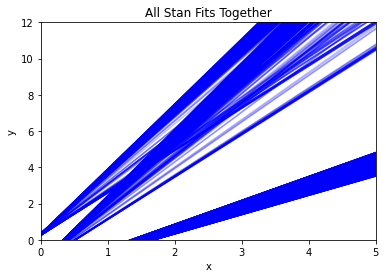

In [25]:
import pystan
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')
dfk = pd.DataFrame(df)
plt.scatter(dfk['age'], dfk['height'])
plt.xlabel('age')
plt.ylabel('height')
plt.title('Data of Kung people')

plt.savefig('explore.pdf')
plt.show()

'''
a_bar = np.mean(df['age'])
a = df.iloc[0:50, 2]
for i in range(50):
    alpha = random.normal(178, 20, 1)
    beta = random.normal(0, 10, 1)
    h = alpha + beta * (a - a_bar)
'''

    
model = """
data {
  int<lower=1> N;
  vector[N] a;
  vector[N] h;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  // priors
  alpha ~ normal(0, 10);
  beta ~ normal(0, 10);
  sigma ~ uniform(0, 50); 

  // model
  h ~ normal(a * beta + alpha, sigma);
}"""
stan_model = pystan.StanModel(model_code=model)
data_dict = {"a": dfk["age"], "h": dfk["height"], "N": len(dfk)}
stan_fit = stan_model.sampling(data=data_dict)
stan_results = pd.DataFrame(stan_fit.extract())
print(stan_results.describe())

for row in range(0, len(stan_results)):
    fit_line = np.poly1d([stan_results["beta"][row], stan_results["alpha"][row]])
    x = np.arange(6)
    y = fit_line(x)
    plt.plot(x, y, "b-", alpha=0.25, zorder=1)
plt.scatter(dfk["age"], df["height"], c='r', zorder=2)
plt.title("All Stan Fits Together")
plt.ylim([0, 12])
plt.ylabel("y")
plt.xlim([0, 5])
plt.xlabel("x")
plt.savefig("lines.pdf")
plt.show()

